Import Data

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [403]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.rcParams['legend.fontsize'] = 22

In [357]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","loans" ,"persloans", "agloans", "reloans", "ciloans"]]

Get x-axis labels

In [358]:
df_forLabels = df.sort_values(by=["year", "quarter"])
df_forLabels = df_forLabels[["year", "quarter"]]
df_forLabels = df_forLabels.drop_duplicates()
labels = []
for row in df_forLabels.itertuples():
    dictRow = row._asdict()
    labels.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))
ser_labels = pd.Series(labels)
ser_labels.index

RangeIndex(start=0, stop=152, step=1)

In [359]:
pivot = pd.pivot_table(df, index=["year", "quarter"], values=["loans","persloans", "agloans", "reloans", "ciloans"], aggfunc={"agloans": np.sum, "ciloans": np.sum, "loans": np.sum,"persloans": np.sum, "reloans": np.sum})
#fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,150,10))
years = [str(year) for year in range(1975, 2014)]
pivot
#ax.set_xticklabels(years, rotation=60)
#pivot.plot(ax=ax)
#print(type(pivot.loans))
#print(pivot.loans)
#ax.set_xticklabels(labels, rotation=60)
#ax.plot(pivot)

agloans       ciloans         loans     persloans       reloans
year   quarter                                                                    
1976.0 1.0      20441221.0  1.676811e+08  4.979078e+08  1.060998e+08  1.376262e+08
       2.0      22177608.0  1.702594e+08  5.121950e+08  1.105997e+08  1.423676e+08
       3.0      22891098.0  1.703788e+08  5.198481e+08  1.151447e+08  1.447915e+08
       4.0      23236481.0  1.780387e+08  5.413140e+08  1.185939e+08  1.501127e+08
1977.0 1.0      23679447.0  1.794227e+08  5.443855e+08  1.203665e+08  1.527350e+08
       2.0      25654452.0  1.847227e+08  5.691111e+08  1.282208e+08  1.606904e+08
       3.0      26282762.0  1.873944e+08  5.894286e+08  1.349610e+08  1.698303e+08
       4.0      25738061.0  1.963861e+08  6.174419e+08  1.409665e+08  1.776548e+08
1978.0 1.0      25430487.0  2.019310e+08  6.254696e+08  1.434821e+08  1.822649e+08
       2.0      27004808.0  2.114837e+08  6.609582e+08  1.540780e+08  1.920315e+08
       3.0      28061878.0  2.136983e+08  6.857319e+08  1.622529e+08  2.027878e+08
       4.0      28644625.0  3.084827e+08  8.594126e+08  1.718011e+08  2.169374e+08
1979.0 1.0      28568803.0  3.150647e+08  8.658298e+08  1.740961e+08  2.226560e+08
       2.0      30246358.0  3.295213e+08  9.064511e+08  1.827398e+08  2.320669e+08
       3.0      31278178.0  3.415252e+08  9.395805e+08  1.891959e+08  2.423246e+08
       4.0      31429442.0  3.507394e+08  9.652473e+08  1.926479e+08  2.488118e+08
1980.0 1.0      31034808.0  3.553541e+08  9.711778e+08  1.894684e+08  2.545423e+08
       2.0      31669404.0  3.623253e+08  9.781737e+08  1.849286e+08  2.572971e+08
       3.0      32273954.0  3.728004e+08  9.987059e+08  1.859509e+08  2.624784e+08
       4.0      32283570.0  3.908470e+08  1.036911e+09  1.874048e+08  2.686496e+08
1981.0 1.0      32044443.0  3.938253e+08  1.038640e+09  1.829522e+08  2.723027e+08
       2.0      33934357.0  4.109977e+08  1.075055e+09  1.858841e+08  2.786202e+08
       3.0      34323327.0  4.290762e+08  1.110798e+09  1.898194e+08  2.855352e+08
       4.0      33651773.0  4.545068e+08  1.152175e+09  1.928928e+08  2.910453e+08
1982.0 1.0      34033761.0  4.665138e+08  1.163195e+09  1.889862e+08  2.957412e+08
       2.0      36514798.0  4.827501e+08  1.195489e+09  1.920335e+08  3.004897e+08
       3.0      37684890.0  4.955164e+08  1.220066e+09  1.951931e+08  3.044615e+08
       4.0      36997694.0  5.039821e+08  1.244356e+09  1.990085e+08  3.075774e+08
1983.0 1.0      37188834.0  5.056254e+08  1.242586e+09  1.957102e+08  3.101873e+08
       2.0      39234165.0  5.060385e+08  1.264439e+09  2.027290e+08  3.174297e+08
       3.0      39933165.0  5.068143e+08  1.284405e+09  2.124443e+08  3.270850e+08
       4.0      39875743.0  5.242839e+08  1.333719e+09  2.242292e+08  3.355642e+08
1984.0 1.0      40137879.0  5.350201e+08  1.396263e+09  2.266319e+08  3.478052e+08
       2.0      42181327.0  5.531802e+08  1.448122e+09  2.402929e+08  3.613137e+08
       3.0      42364096.0  5.528023e+08  1.472445e+09  2.517678e+08  3.724462e+08
       4.0      40380789.0  5.650937e+08  1.525527e+09  2.663935e+08  3.845076e+08
1985.0 1.0      38968524.0  5.685899e+08  1.535034e+09  2.721029e+08  3.935735e+08
       2.0      40466401.0  5.707313e+08  1.569728e+09  2.845533e+08  4.063826e+08
       3.0      39706640.0  5.744284e+08  1.607008e+09  2.968358e+08  4.224016e+08
       4.0      36105573.0  5.772415e+08  1.645063e+09  3.078026e+08  4.368293e+08
1986.0 1.0      34344965.0  5.797833e+08  1.654673e+09  3.076195e+08  4.497043e+08
       2.0      34657179.0  5.807040e+08  1.683284e+09  3.166298e+08  4.652730e+08
       3.0      34180775.0  5.716879e+08  1.694978e+09  3.244406e+08  4.847837e+08
       4.0      31590237.0  6.002406e+08  1.766921e+09  3.338706e+08  5.132286e+08
1987.0 1.0      29198820.0  5.845011e+08  1.750331e+09  3.269705e+08  5.305105e+08
       2.0      30819014.0  5.821576e+08  1.778808e+09  3.311859e+08  5.546770e+08
       3.0      31040308.0  5.79652

Loan Distribution. Loan types plotted. Sum of loan types.

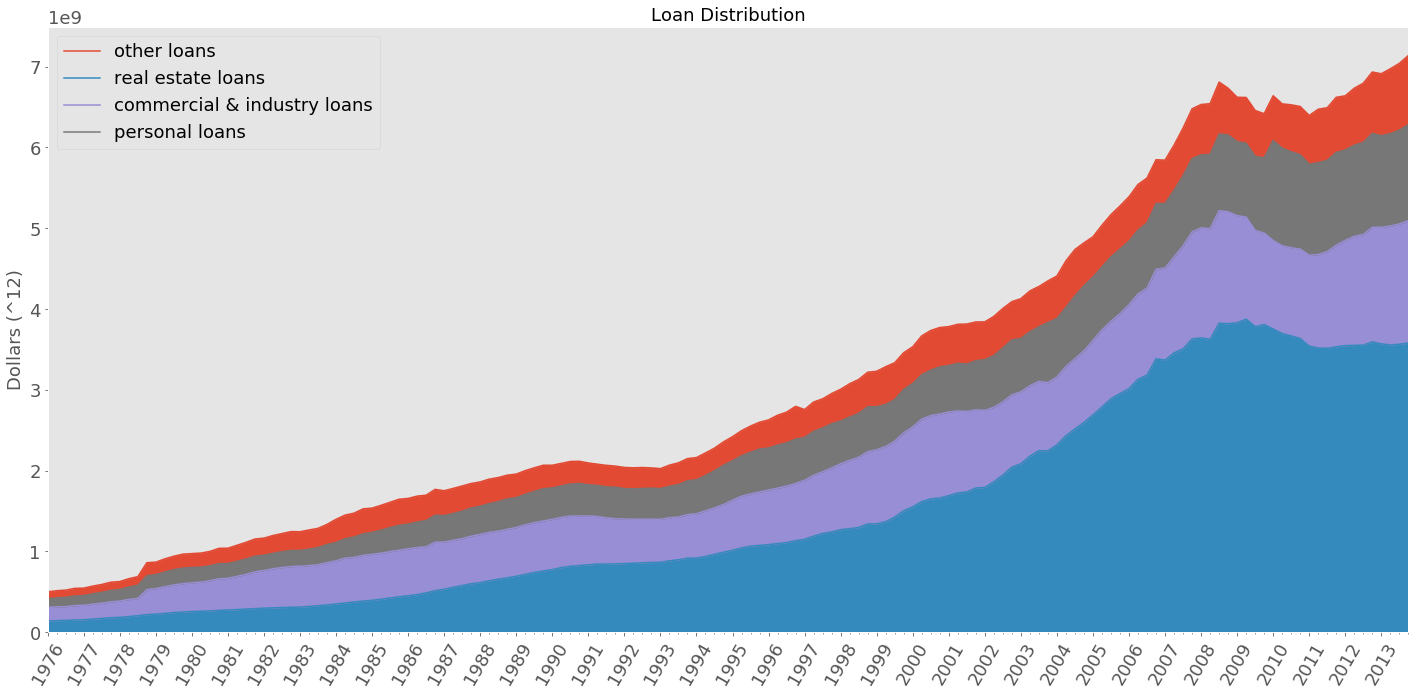

In [360]:
pivot_copy = pivot.copy()
pivot_copy = pivot.reset_index()
pivot_copy["re+ci"] = pivot_copy["reloans"] + pivot_copy["ciloans"]
pivot_copy["re+ci+pers"] = pivot_copy["re+ci"] + pivot_copy["persloans"]
#pivot_copy["re+ci+pers+ag"] = pivot_copy["re+ci+pers"] + pivot_copy["agloans"]
fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Loan Distribution")
pivot_copy.loans.plot.area(ax=ax)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
#pivot_copy.reloans.plot.area(ax=ax,stacked=True)
#pivot_copy["re+ci"].plot.area(ax=ax, stacked=True)
#pivot_copy["re+ci+pers"].plot(ax=ax)
#pivot_copy["re+ci+pers+ag"].plot(ax=ax)
pivot_copy.plot.area(ax=ax, y=["reloans", "ciloans", "persloans"])
ax.set_xticklabels(years, rotation=60)
ax.legend(["other loans", "real estate loans", "commercial & industry loans", "personal loans"])
ax.set_ylabel("Dollars (^12)")
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LoanDistribution_7613')
#fig.("Loan Distribution")

['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


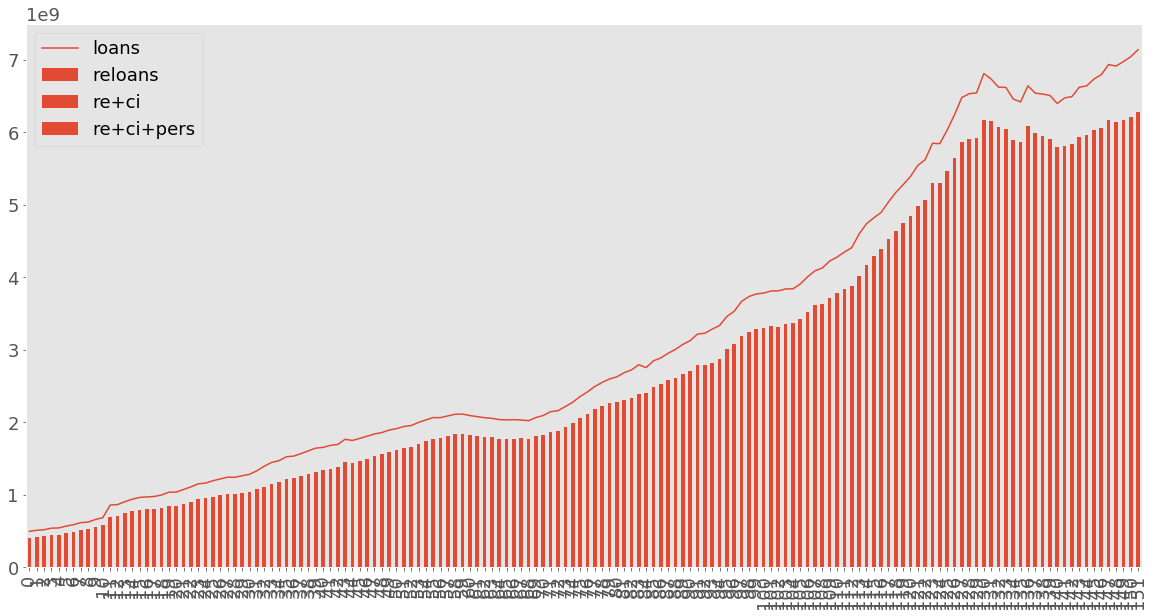

In [361]:
fig, ax1 = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
#ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
#ax.set_xticklabels(years, rotation=60)
pivot_copy.loans.plot(ax=ax1)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
pivot_copy.reloans.plot.bar(ax=ax1)
pivot_copy["re+ci"].plot.bar(ax=ax1)
pivot_copy["re+ci+pers"].plot.bar(ax=ax1)
#pivot_copy["re+ci+pers+ag"].plot.bar(ax=ax1)
ax1.legend()
ax1.grid()
print(years)

Security Distribution

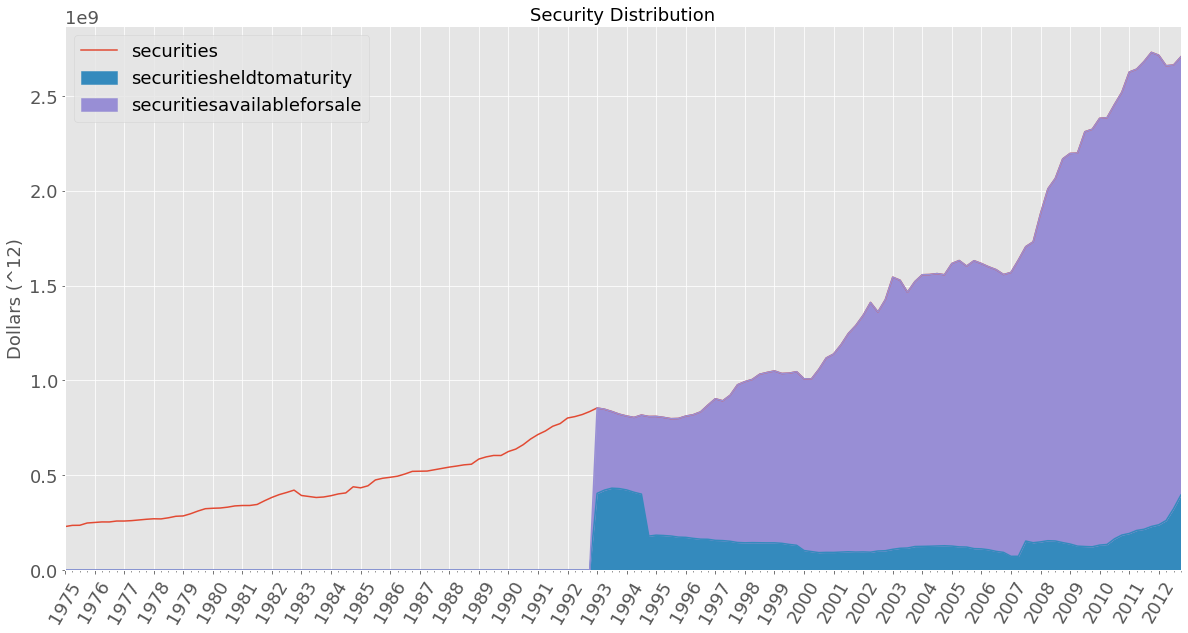

In [362]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"]]
pivot1 = pd.pivot_table(df, index=["year", "quarter"], values=["securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"], aggfunc={"securities": np.sum, "securitiesheldtomaturity": np.sum, "securities_ammcost": np.sum,"securitiesavailableforsale": np.sum})
pivot1 = pivot1.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Security Distribution")
pivot1.securities.plot(ax=ax2)
pivot1.plot.area(ax=ax2, y=["securitiesheldtomaturity", "securitiesavailableforsale"])
ax2.legend()
ax2.grid(True)
ax2.set_ylabel("Dollars (^12)")
ax2.set_xticklabels(years, rotation=60)
plt.savefig('LatexVorlage/graphs/Not Used/OtherAnalysis_SecurityDistribution_7613.png')

Analysis of deposits

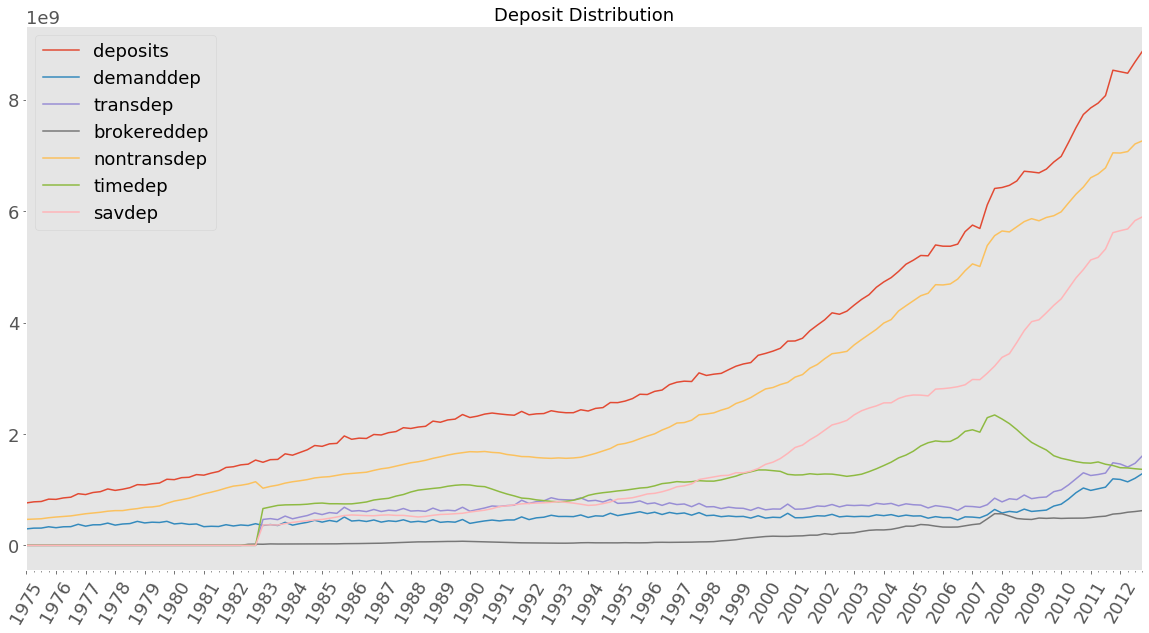

In [363]:
df = df_raw[["rssdid", "name", 'year', "quarter","deposits", "demanddep", "transdep","brokereddep" ,"timedepge100k", "timedeple100k", "timesavdep", "nontransdep", "timedep", "savdep"]]
pivot2 = pd.pivot_table(df, index=["year", "quarter"], values=["deposits", "demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"], aggfunc={"deposits": np.sum, "demanddep": np.sum, "transdep": np.sum, "brokereddep": np.sum,"nontransdep": np.sum, "timedep": np.sum, "savdep": np.sum})
pivot2 = pivot2.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
#pivot2.plot(ax=ax2)
pivot2.plot(ax=ax2, y=["deposits","demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"])
ax2.set_xticklabels(years, rotation=60)
ax2.legend()
ax2.grid()

Non-Transaction deposits compared with time and saving deposits

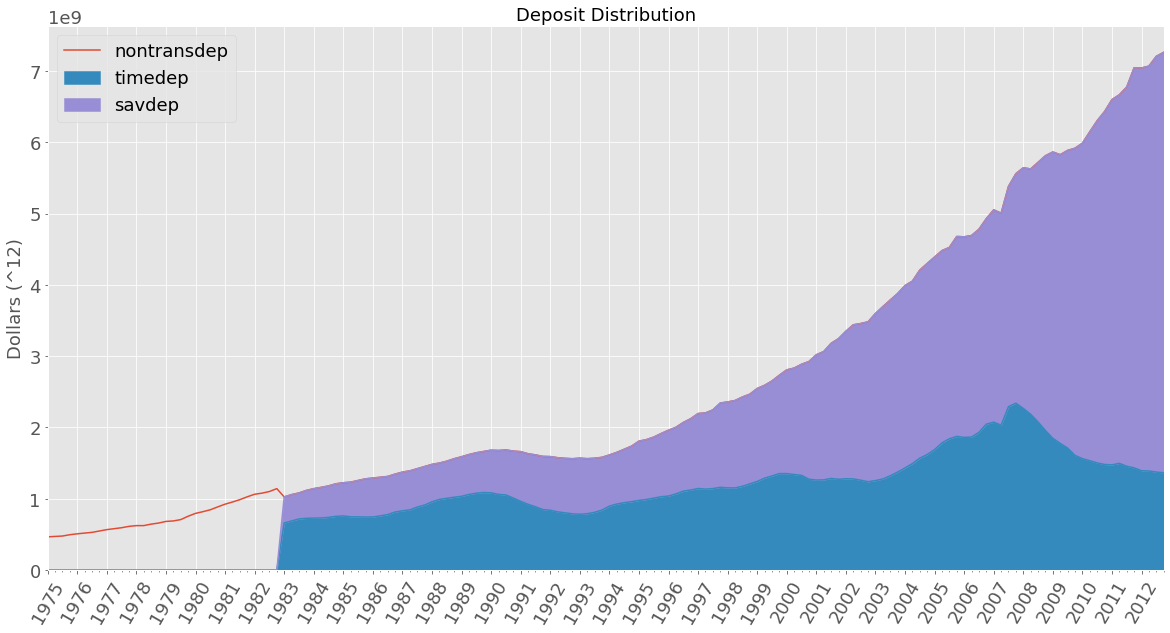

In [364]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.nontransdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["timedep", "savdep"])
ax2.set_xticklabels(years, rotation=60)

ax2.legend()
ax2.set_ylabel("Dollars (^12)")
plt.savefig('LatexVorlage/graphs/Not Used/OtherAnalysis_DepositDistribution_7613.png')

Transaction deposits analysed.

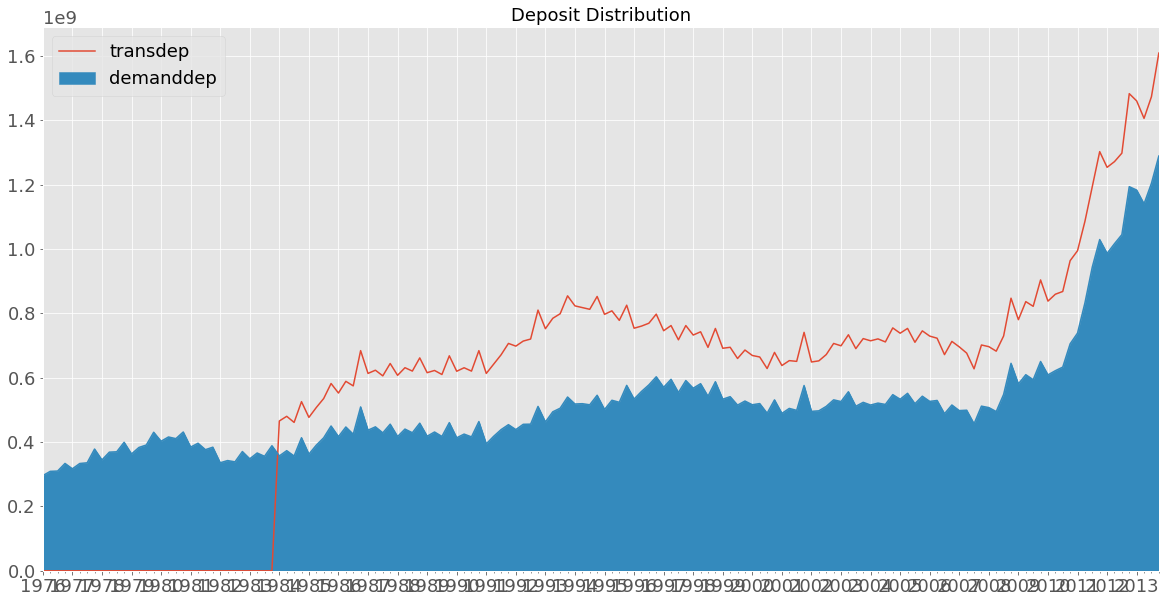

In [365]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.transdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["demanddep"])
ax2.legend()

Total deposits = transdep + nontransdep

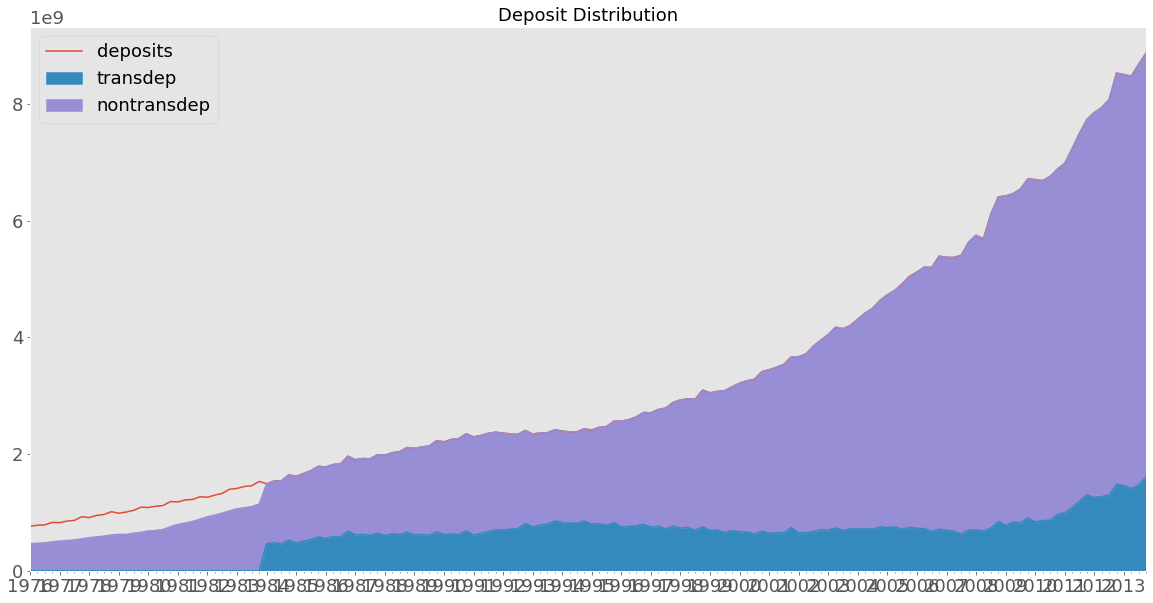

In [366]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.deposits.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["transdep", "nontransdep"])
ax2.legend()
ax2.grid()

Analysing liability side:

In [392]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities","subordinateddebt", "liabilities"]]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherliab"] = df_agg["assets"] - (df_agg.iloc[:,4:11].sum(axis=1))


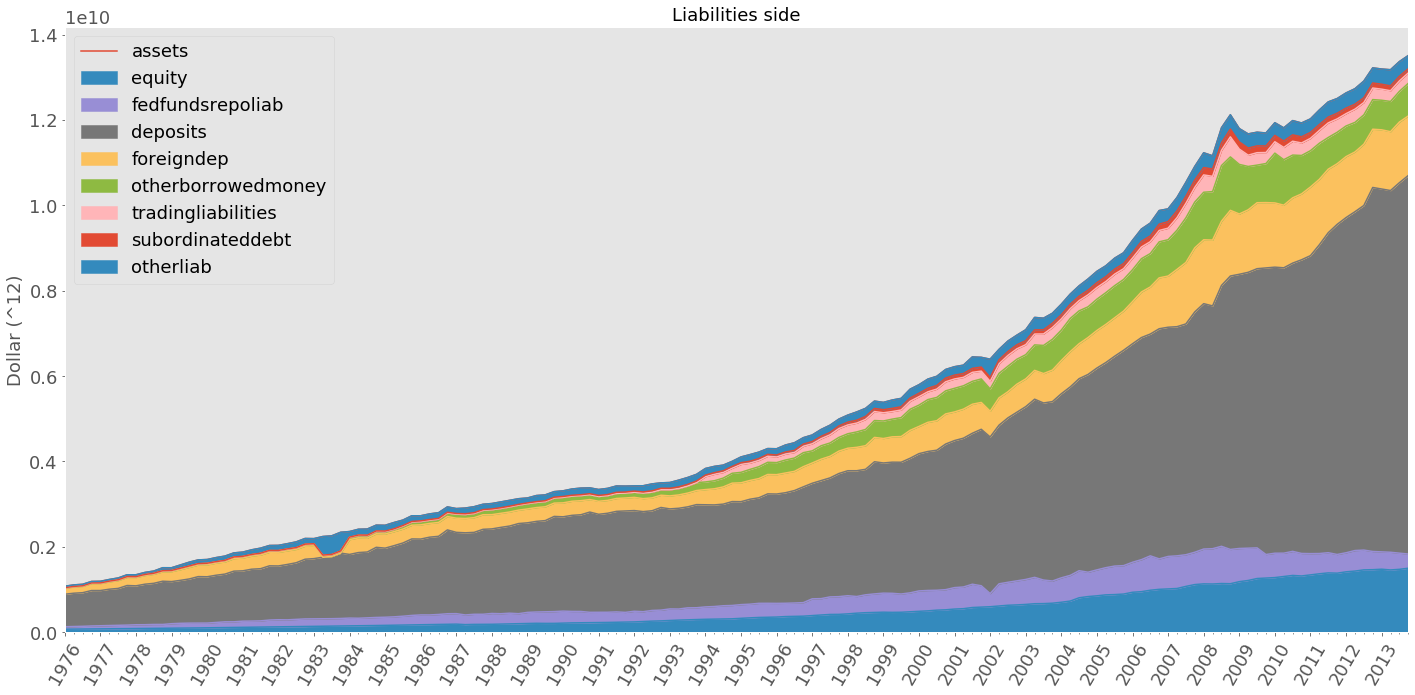

In [393]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))

ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
ax.set_ylabel("Dollar (^12)")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
#ax.set_ylabel("Dollar (^12)")
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LiabilitiesDistribution_7613.png')

Share of balance sheet positions (liabilities side)

In [398]:
df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_agg.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

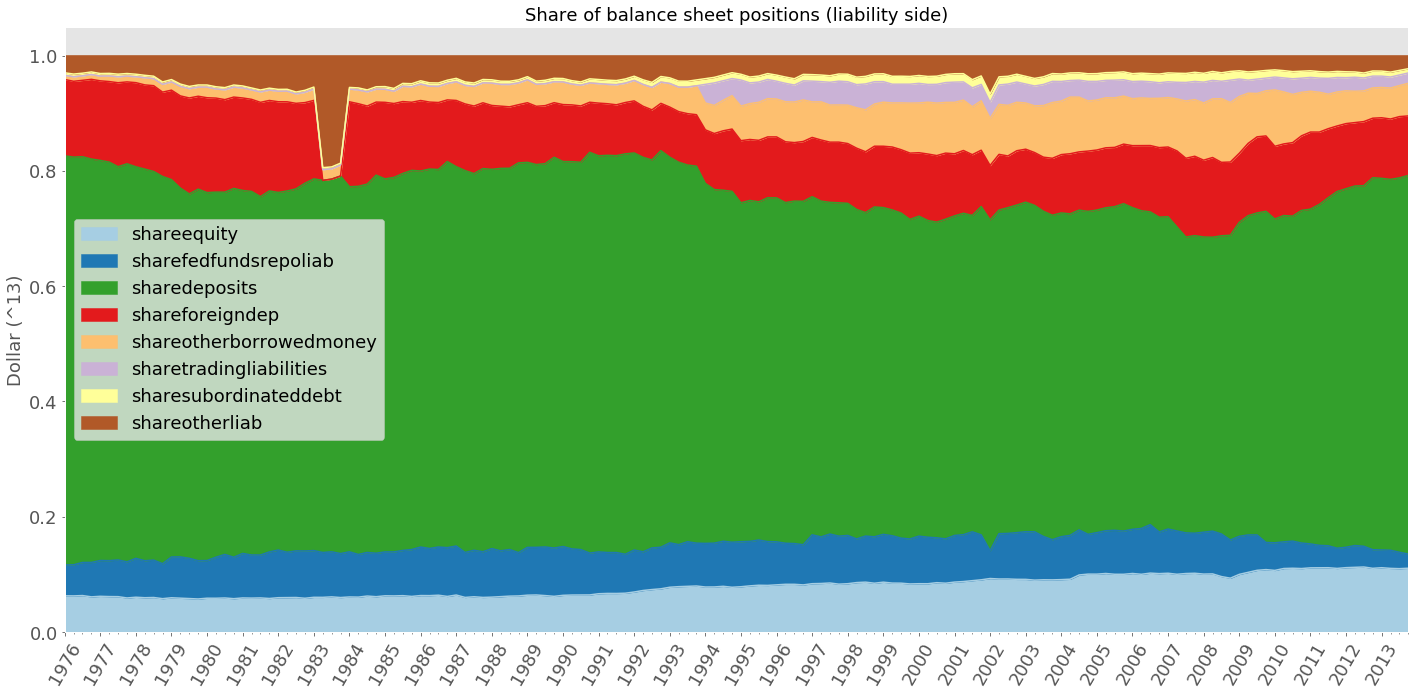

In [416]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Dollar (^13)")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofLiabilities_7613.png')

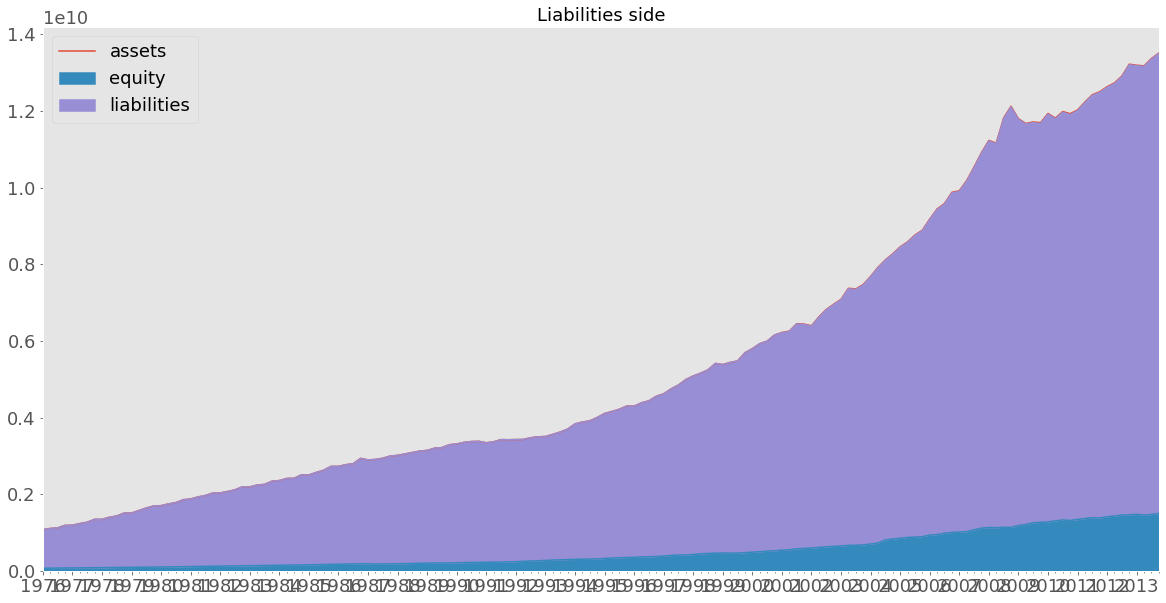

In [376]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","liabilities"])
ax.legend()
ax.grid()

Analysing assets side:

In [554]:
df = df_raw[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df = df[(df.rssdid!=1456501) & (df.bhcid!=2380443)]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherassets"] = df_agg["assets"] - (df_agg.iloc[:,5:10].sum(axis=1))
#df_agg.iloc[:,5:10]
df_agg

year  quarter        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets  interestratederivatives   otherassets
0    1976.0      1.0  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0                      0.0  5.979932e+07
1    1976.0      2.0  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0                      0.0  6.314197e+07
2    1976.0      3.0  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0                      0.0  6.542551e+07
3    1976.0      4.0  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0                      0.0  6.589929e+07
4    1977.0      1.0  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0                      0.0  6.847658e+07
5    1977.0      2.0  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0                      0.0  7.105964e+07
6    1977.0      3.0  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0                      0.0  7.114599e+07
7    1977.0      4.0  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0                      0.0  7.357152e+07
8    1978.0      1.0  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0                      0.0  7.595768e+07
9    1978.0      2.0  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0                      0.0  8.176384e+07
10   1978.0      3.0  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0                      0.0  8.533574e+07
11   1978.0      4.0  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0                      0.0  9.345297e+07
12   1979.0      1.0  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0                      0.0  9.755706e+07
13   1979.0      2.0  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0                      0.0  1.059503e+08
14   1979.0      3.0  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0                      0.0  1.135400e+08
15   1979.0      4.0  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0                      0.0  1.176389e+08
16   1980.0      1.0  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0                      0.0  1.251570e+08
17   1980.0      2.0  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0                      0.0  1.302572e+08
18   1980.0      3.0  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0                      0.0  1.303950e+08
19   1980.0      4.0  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0                      0.0  1.376221e+08
20   1981.0      1.0  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0                      0.0  1.477132e+08
21   1981.0      2.0  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         724711

Datasets for top 0.1%, 1%, 5%, 50%

In [555]:
year = 1976

topOnePercent = pd.DataFrame()
topFivePercent = pd.DataFrame()
topTenPercent = pd.DataFrame()
topFiftyPercent = pd.DataFrame()

for i in range(38):
    quarter=1
    temp_df_year = df[df.year==year]
    #print(year)
    
    for j in range(4):
        #print(quarter)
        temp_df = temp_df_year[temp_df_year.quarter==quarter]
        temp_df = temp_df.sort_values(by=["assets"], ascending=False )
        #print(len(temp_df))
        onepercent = round(0.001*len(temp_df))
        fivepercent = round(0.01*len(temp_df))
        tenpercent = round(0.10*len(temp_df))
        fiftypercent = round(0.50*len(temp_df))
        #print(onepercent)
        temp_df_One = temp_df.iloc[:onepercent,:]
        temp_df_Five = temp_df.iloc[:fivepercent, :]
        temp_df_Ten = temp_df.iloc[:tenpercent, :]
        temp_df_Fifty = temp_df.iloc[:fiftypercent, :]
        topOnePercent = topOnePercent.append(temp_df_One)
        topFivePercent = topFivePercent.append(temp_df_Five)
        topTenPercent = topTenPercent.append(temp_df_Ten)
        topFiftyPercent = topFiftyPercent.append(temp_df_Fifty)
        quarter = quarter + 1
    
    year = year + 1

In [556]:
df_aggOnePercent = topOnePercent.groupby(["year", "quarter"]).sum()
df_aggFivePercent = topFivePercent.groupby(["year", "quarter"]).sum()
df_aggTenPercent = topTenPercent.groupby(["year", "quarter"]).sum()
df_aggFiftyPercent = topFiftyPercent.groupby(["year", "quarter"]).sum()

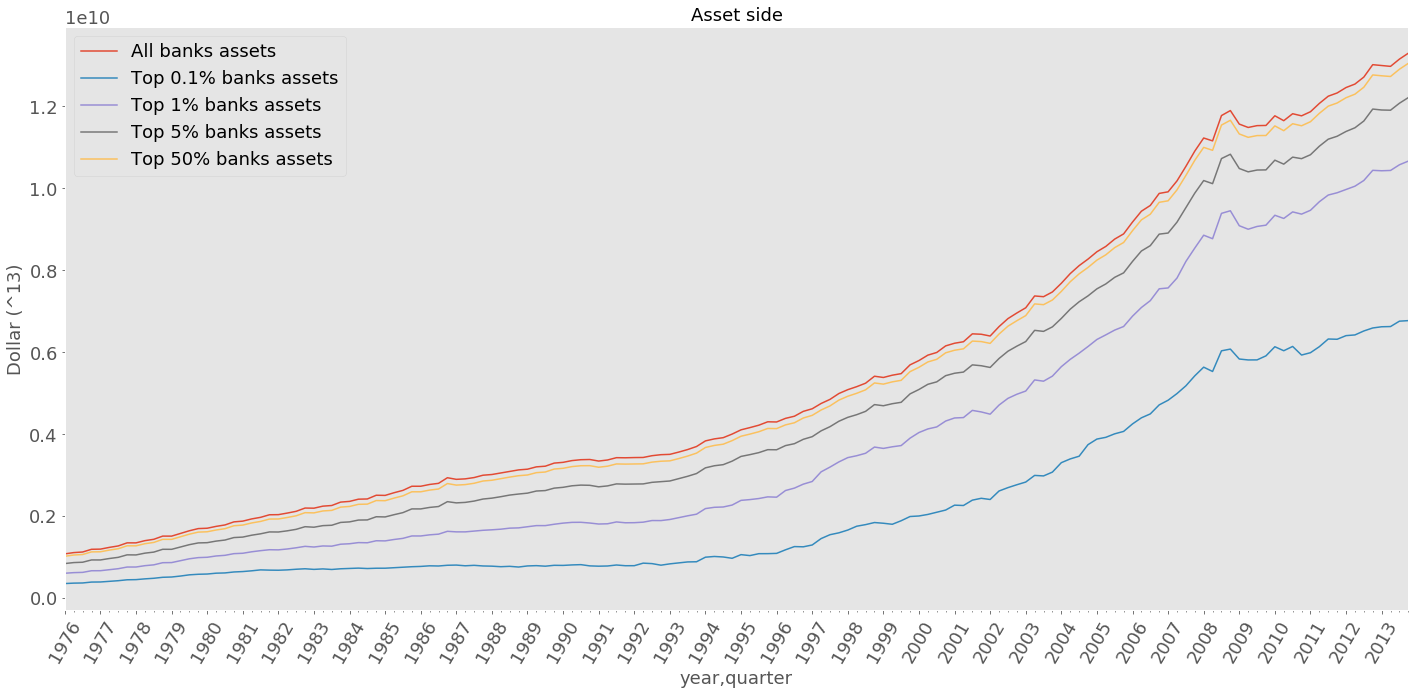

In [557]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^13)")
df_agg.assets.plot(ax=ax)
df_aggOnePercent.assets.plot(ax=ax)
df_aggFivePercent.assets.plot(ax=ax)
df_aggTenPercent.assets.plot(ax=ax)
df_aggFiftyPercent.assets.plot(ax=ax)
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["All banks assets","Top 0.1% banks assets", "Top 1% banks assets", "Top 5% banks assets", "Top 50% banks assets"])
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksPercentiles_7613.png')

Growth rates assets per quarter

In [558]:
#add growth column
df_agg_growth = df_agg.copy()
df_agg_growth.insert(2,"growth", 0)

print(df_agg_growth.iloc[1,4])

#loop
for i in range(1,152):
    df_agg_growth.iloc[i,2] = (df_agg_growth.iloc[i,5] - df_agg_growth.iloc[i-1,5]) / df_agg_growth.iloc[i-1,5]

df_agg_growth

4092732445.0


year  quarter    growth        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets  interestratederivatives   otherassets
0    1976.0      1.0  0.000000  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0                      0.0  5.979932e+07
1    1976.0      2.0  0.029340  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0                      0.0  6.314197e+07
2    1976.0      3.0  0.012763  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0                      0.0  6.542551e+07
3    1976.0      4.0  0.059559  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0                      0.0  6.589929e+07
4    1977.0      1.0  0.003328  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0                      0.0  6.847658e+07
5    1977.0      2.0  0.035642  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0                      0.0  7.105964e+07
6    1977.0      3.0  0.028634  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0                      0.0  7.114599e+07
7    1977.0      4.0  0.059458  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0                      0.0  7.357152e+07
8    1978.0      1.0 -0.000143  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0                      0.0  7.595768e+07
9    1978.0      2.0  0.040380  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0                      0.0  8.176384e+07
10   1978.0      3.0  0.023531  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0                      0.0  8.533574e+07
11   1978.0      4.0  0.054510  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0                      0.0  9.345297e+07
12   1979.0      1.0 -0.000277  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0                      0.0  9.755706e+07
13   1979.0      2.0  0.044423  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0                      0.0  1.059503e+08
14   1979.0      3.0  0.040812  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0                      0.0  1.135400e+08
15   1979.0      4.0  0.032280  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0                      0.0  1.176389e+08
16   1980.0      1.0  0.005181  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0                      0.0  1.251570e+08
17   1980.0      2.0  0.026447  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0                      0.0  1.302572e+08
18   1980.0      3.0  0.020133  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0                      0.0  1.303950e+08
19   1980.0      4.0  0.042058  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0                      0.0  1.376221e+08
20   1981.0      1.0  0.009935  7.408022e+09  5.646504e+09 

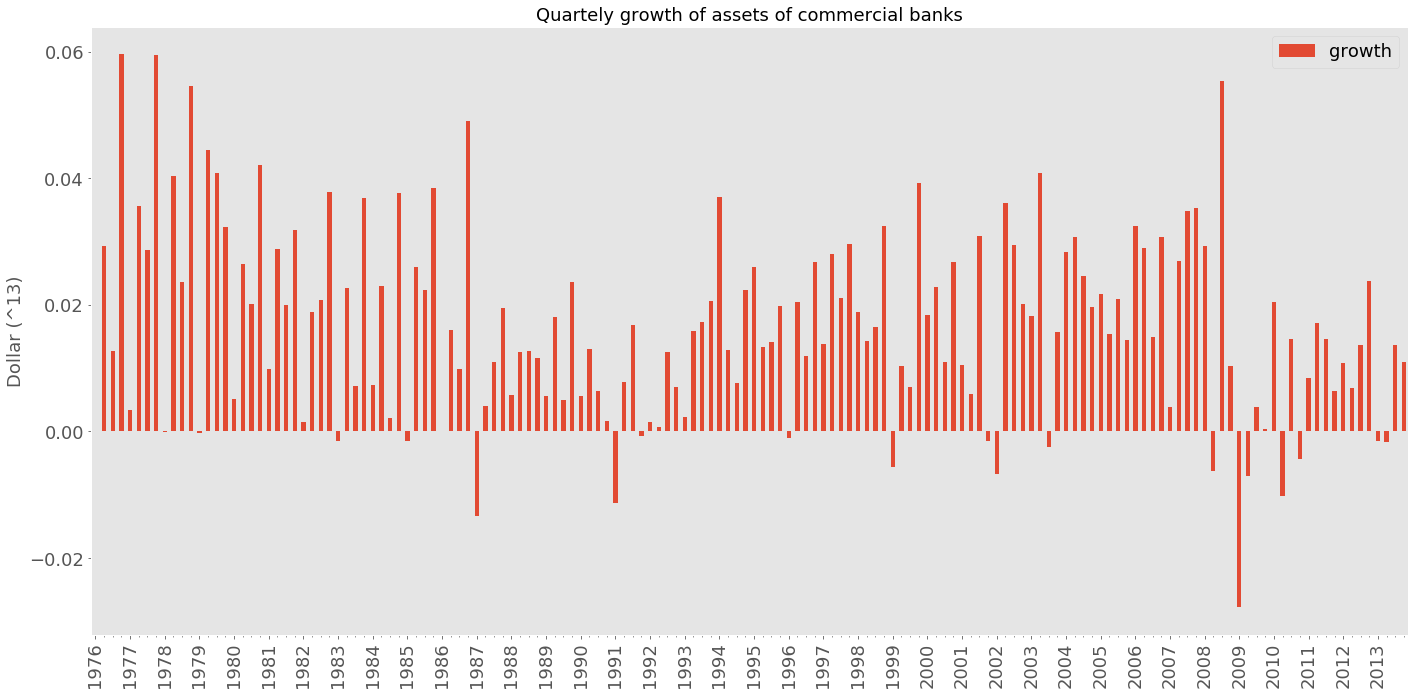

In [559]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Quartely growth of assets of commercial banks")
ax.set_ylabel("Dollar (^13)")
#ax.set_xticklabels(years, rotation=90)
df_agg_growth.plot.bar(ax=ax, y=["growth"])
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=90)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssets_7613.png')

Growth rates assets per year

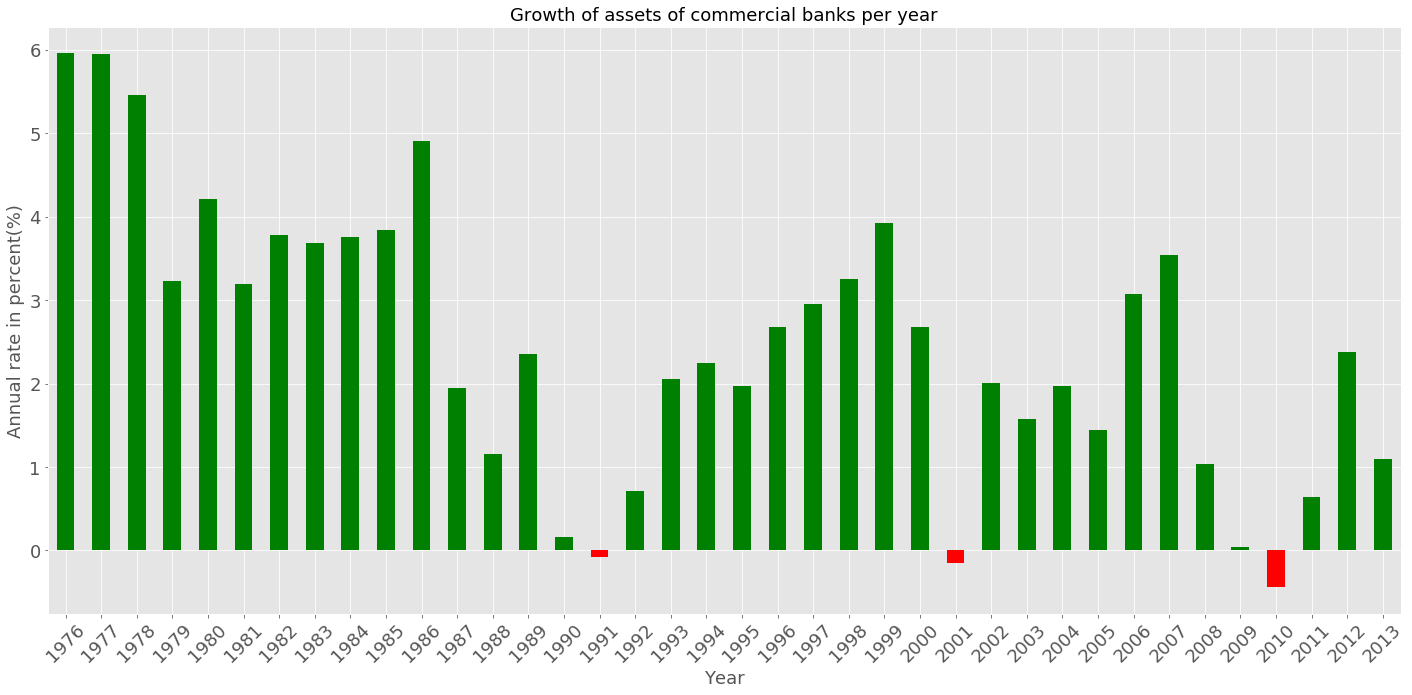

In [592]:
df_agg_growth_year = df_agg_growth.copy()
df_agg_growth_year = df_agg_growth_year[df_agg_growth_year.quarter==4] #filter dataset for quarter 4 entrys
#df_agg_growth_year = df_agg_growth_year.groupby(["year"]).mean()
df_agg_growth_year.growth = df_agg_growth_year.growth * 100

fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.set_title("Growth of assets of commercial banks per year")
ax.set_ylabel("Annual rate in percent(%)")
ax.set_xlabel("Year")
#ax.set_xticklabels(years, rotation=90)
df_agg_growth_year["positive"] = df_agg_growth_year.growth > 0
#df_agg_growth_year.plot.bar(ax=ax, y=["growth"], color=df_agg_growth_year.positive.map({True: 'r', False: 'g'}))
df_agg_growth_year.growth.plot(kind="bar", color=df_agg_growth_year.positive.map({True: 'g', False: 'r'}))
ax.set_xticks(range(0,38))
ax.set_xticklabels(years, rotation=45)
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssetsYear_7613.png')
#df_agg_growth_year

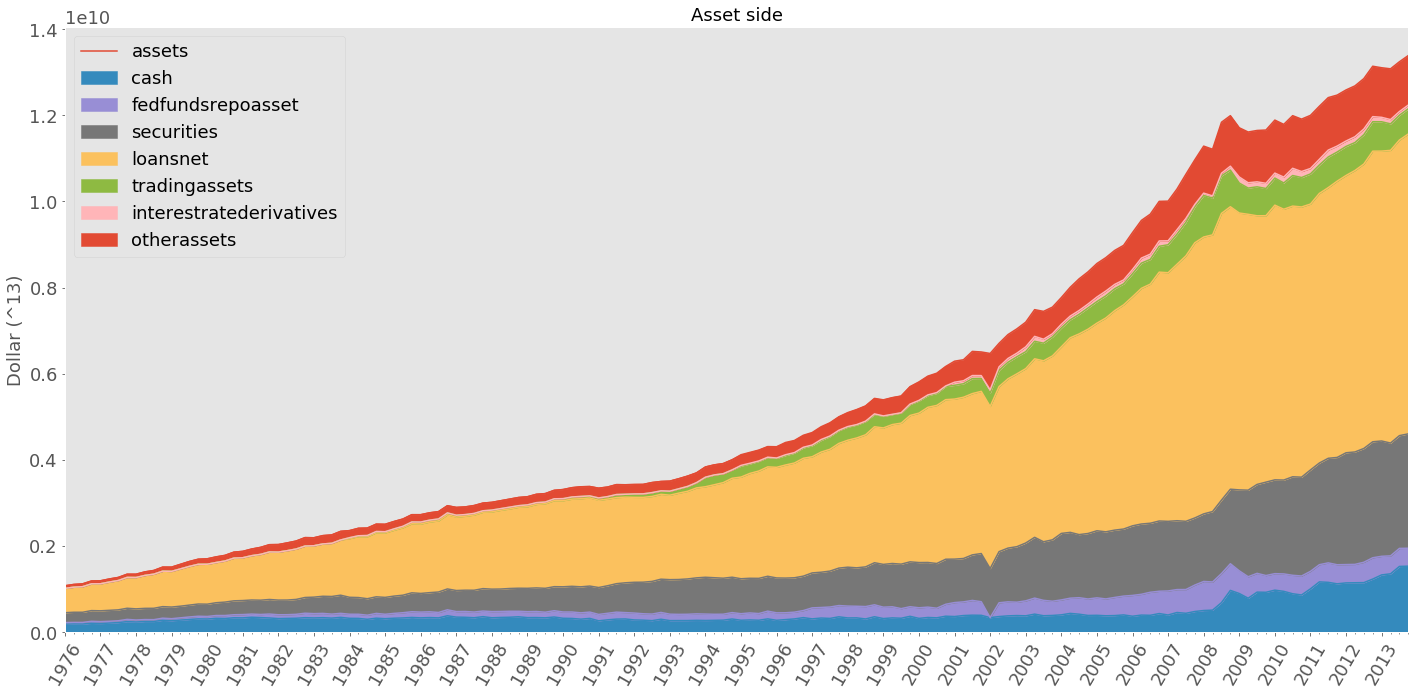

In [561]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^13)")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives", "otherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_AssetDistribution_7613.png')

In [562]:
df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_agg.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "sharebhcid"], axis=1, inplace=True)

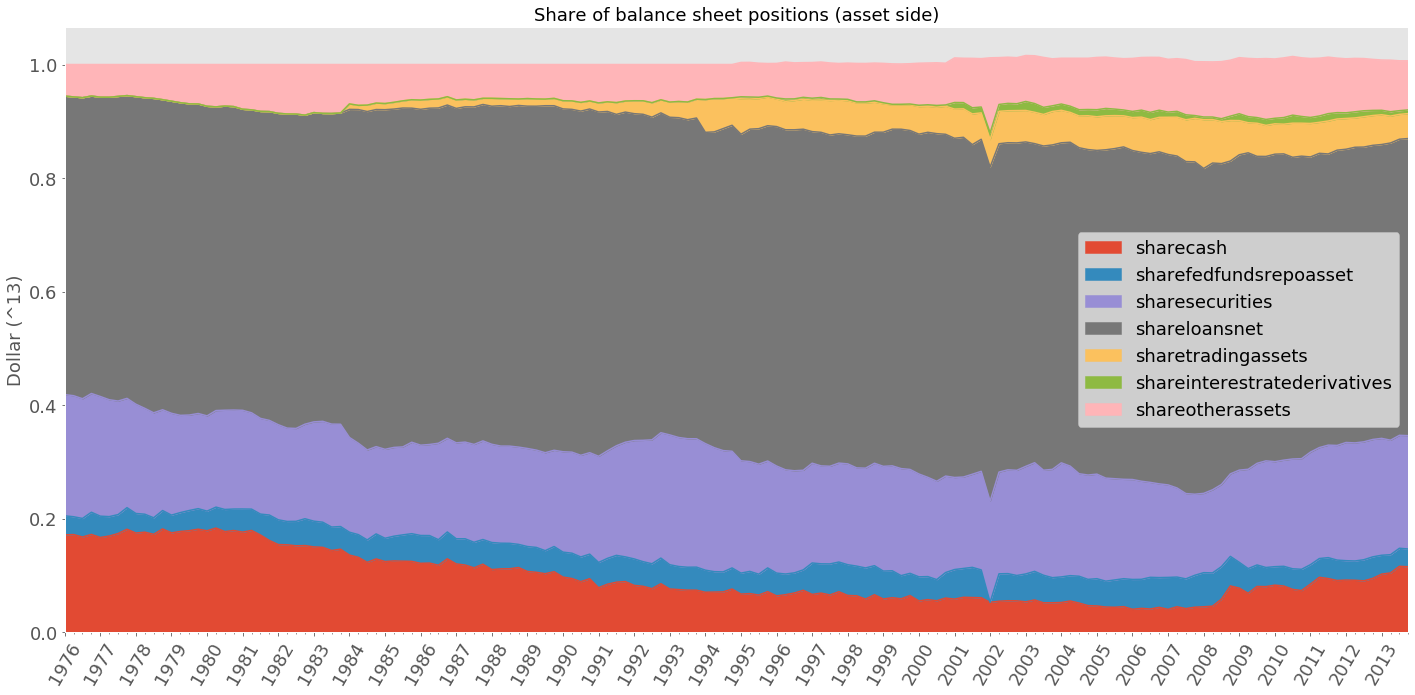

In [563]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (asset side)")
ax.set_ylabel("Dollar (^13)")
#df_agg.assets.plot(ax=ax)
df_agg_share.plot.area(ax=ax)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofAssets_7613.png')

Median Bank: Assets and Liabilities

In [564]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median


year  quarter    rssdid    assets   equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
0    1976.0      1.0  518859.0   15427.0   1256.0               0.0   13999.0         0.0                 0.0                 NaN      14197.0
1    1976.0      2.0  519300.0   15886.5   1295.0               0.0   14327.5         0.0                 0.0                 NaN      14636.5
2    1976.0      3.0  519183.5   16266.0   1346.0               0.0   14676.5         0.0                 0.0                 NaN      14952.0
3    1976.0      4.0  519146.0   16866.0   1348.0               0.0   15269.0         0.0                 0.0                 NaN      15524.0
4    1977.0      1.0  518859.0   17211.0   1398.0               0.0   15547.0         0.0                 0.0                 NaN      15790.0
5    1977.0      2.0  518849.5   17659.0   1433.5               0.0   15846.0         0.0                 0.0                 NaN      16161.5
6    1977.0      3.0  518429.5   18157.5   1488.5               0.0   16296.5         0.0                 0.0                 NaN      16683.5
7    1977.0      4.0  518279.0   19128.0   1492.0               0.0   17300.0         0.0                 0.0                 NaN      17569.0
8    1978.0      1.0  518550.0   19297.0   1551.0               0.0   17410.0         0.0                 0.0                 NaN      17753.0
9    1978.0      2.0  518617.0   20070.0   1602.5               0.0   18026.0         0.0                 0.0                 NaN      18469.0
10   1978.0      3.0  518550.0   20534.0   1664.0               0.0   18419.0         0.0                 0.0                 NaN      18894.0
11   1978.0      4.0  518265.0   21073.5   1672.0               0.0   18956.5         0.0                 0.0                 NaN      19378.5
12   1979.0      1.0  518251.0   21175.5   1738.0               0.0   18903.5         0.0                 0.0                 NaN      19415.0
13   1979.0      2.0  518639.5   21814.5   1798.5               0.0   19394.0         0.0                 0.0                 NaN      19921.5
14   1979.0      3.0  518485.0   22259.0   1870.0               0.0   19783.5         0.0                 0.0                 NaN      20348.0
15   1979.0      4.0  518718.0   22988.0   1880.0               0.0   20528.0         0.0                 0.0                 NaN      21029.0
16   1980.0      1.0  518765.0   23175.0   1967.0               0.0   20609.0         0.0                 0.0                 NaN      21156.0
17   1980.0      2.0  519300.0   23550.0   2023.0               0.0   20912.0         0.0                 0.0                 NaN      21483.5
18   1980.0      3.0  519436.0   24102.0   2076.0               0.0   21442.0         0.0                 0.0                 NaN      21970.0
19   1980.0      4.0  518952.0   24995.5   2109.5               0.0   22208.5         0.0                 0.0                 NaN      22840.0
20   1981.0      1.0  518671.0   25451.0   2198.0               0.0   22539.0         0.0                 0.0                 NaN      23307.0
21   1981.0      2.0  518485.0   25927.0   2261.5               0.0   22908.0         0.0                 0.0                 NaN      23692.5
22   1981.0      3.0  518251.0   26225.5   2339.0               0.0   23101.0         0.0                 0.0                 NaN      23948.5
23   1981.0      4.0  518265.0   27495.0   2336.0               0.0   24259.0         0.0                 0.0                 NaN      25218.0
24   1982.0      1.0  518387.0   27889.0   2408.0               0.0   24497.0         0.0                 0.0                 NaN      25507.0
25   1982.0      2.0  519244.0   28511.0   2490.0               0.0   24858.0         0.0                 0.0                 NaN      25998.0
26   1982.0      3.0  518608.0   28918.0   2545.0               0.0   25266.0         0.0                 0.0                 NaN      26343.0
27 

In [565]:
df_liab_median_2000 = df_liab_median[(df_liab_median.year==2000) & (df_liab_median.quarter==4)]
df_liab_median_2000_T = df_liab_median_2000.T
df_liab_median_2000_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2000_T = df_liab_median_2000_T[df_liab_median_2000_T[99]!=0]

df_liab_median_2009 = df_liab_median[(df_liab_median.year==2009) & (df_liab_median.quarter==4)]
df_liab_median_2009_T = df_liab_median_2009.T
df_liab_median_2009_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2009_T.rename(columns={"data":135}, inplace=True)
df_liab_median_2009_T = df_liab_median_2009_T[df_liab_median_2009_T[135]!=0]

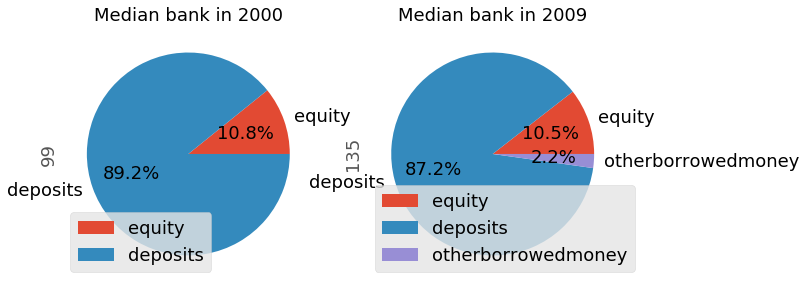

In [566]:
fig, ax = plt.subplots(1,2,figsize=(10,15)) 
#spezifische columns ausw√§hlen
#df_liab_median_2000.rename(columns={"99":"medianbank"}, inplace=True)
ax[0].set_title("Median bank in 2000")
ax[1].set_title("Median bank in 2009")
df_liab_median_2000_T.plot.pie(ax=ax[0], y=99,autopct='%1.1f%%')
df_liab_median_2009_T.plot.pie(ax=ax[1], y=135,autopct='%1.1f%%')

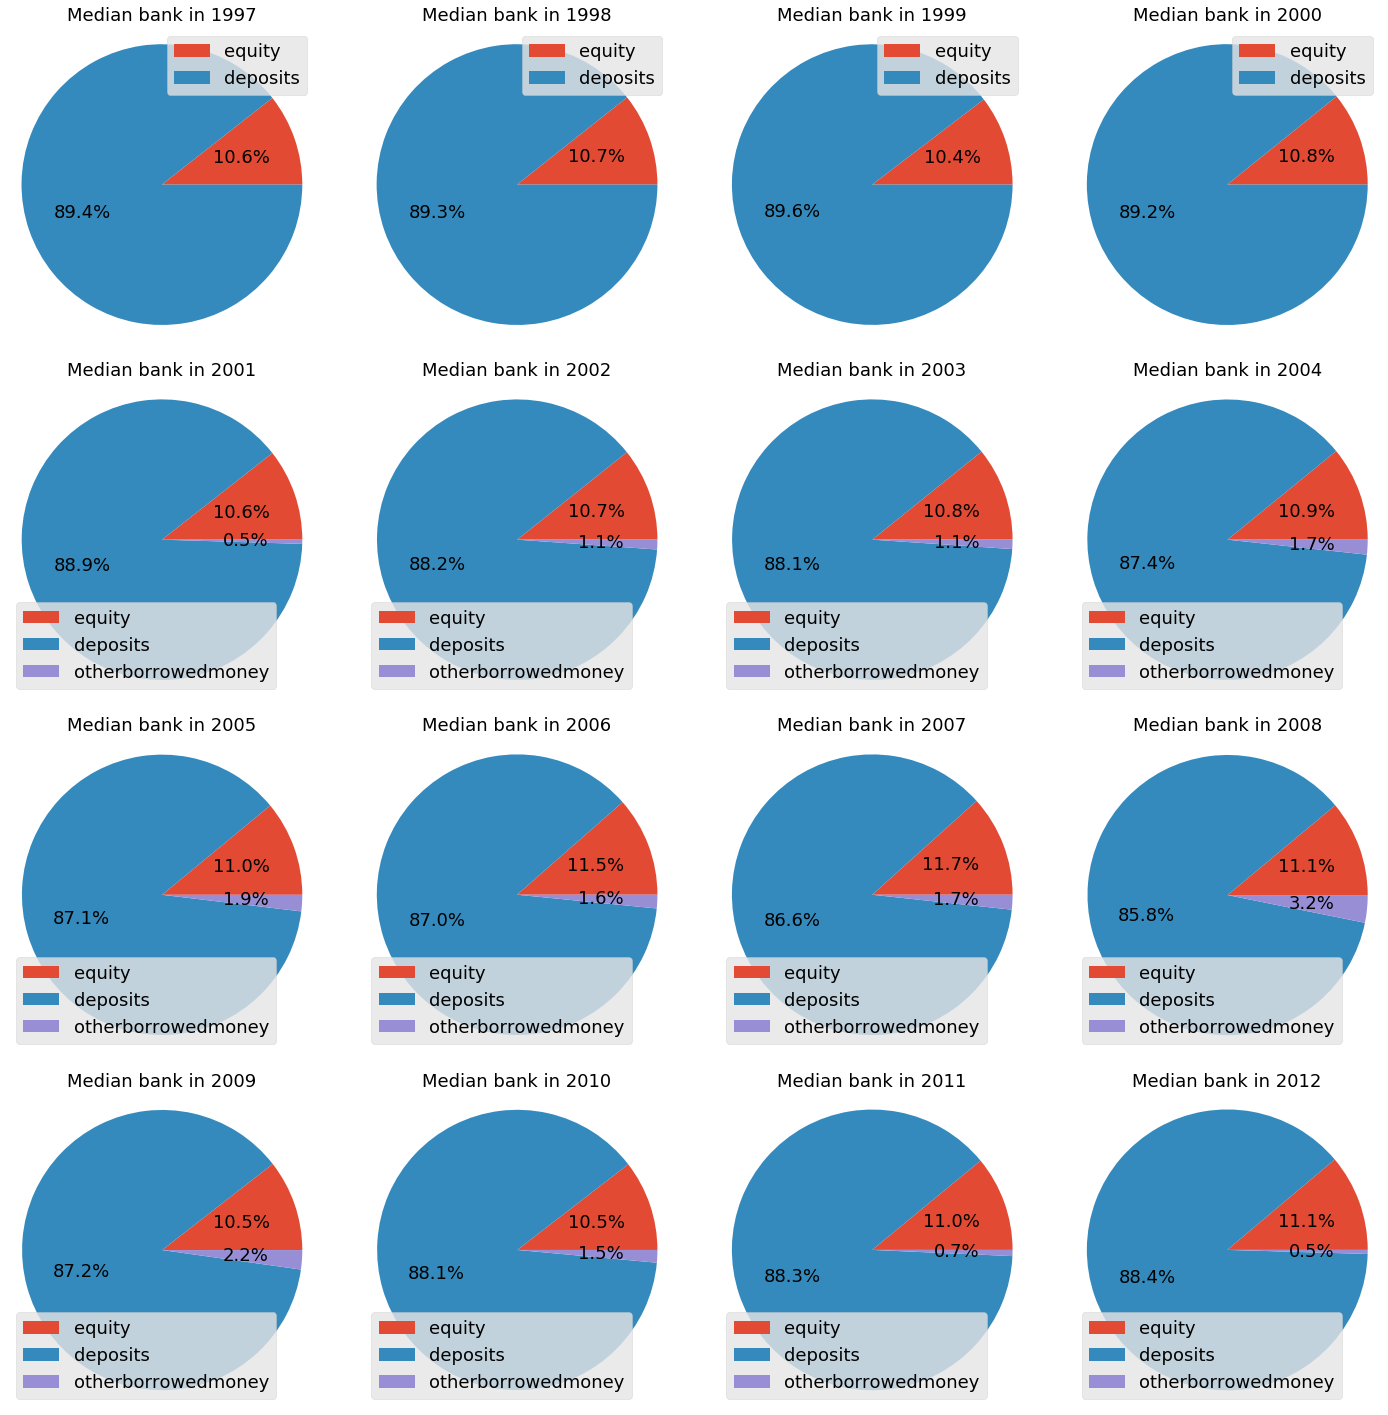

In [567]:

fig, ax = plt.subplots(4,4,figsize=(20,20))
ax = ax.ravel() 
year = 1997

for x in range(0,16):
    temp_df_liab = df_liab_median[(df_liab_median.year==year) & (df_liab_median.quarter==4)]
    
    temp_df_liab_T = temp_df_liab.T
    temp_df_liab_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
    column_name = temp_df_liab_T.columns[0]
    temp_df_liab_T = temp_df_liab_T[temp_df_liab_T[column_name]!=0]
    ax[x].set_title("Median bank in " + str(year))
    #print(temp_df_liab_T.index.values)
    #temp_df_liab_T.plot.pie(ax=ax[x], labels=None, y=column_name,autopct='%1.1f%%')
    ax[x].pie(temp_df_liab_T[column_name], labels=None,autopct='%1.1f%%' )
    ax[x].axis('equal')
    ax[x].legend(temp_df_liab_T.index.values)
    year = year + 1

    
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_MedianBankEveryYear_7613.png')

In [568]:
import seaborn
import probscale

In [569]:
df = df_raw[df_raw[]]

SyntaxError: invalid syntax (<ipython-input-569-e87a99d21d75>, line 1)

In [ ]:
df_sb = df_raw[["assets", "equity","deposits", "tradingliabilities", "liabilities"]]
sns.pairplot(df_sb)